Nadia Putri Natali Lubis

In [1]:
# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import ttest_ind

In [3]:
# Data wrangling #

# Gathering Data

In [4]:
day_df = pd.read_csv("data/day.csv")

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour_df = pd.read_csv("data/hour.csv")

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
561,562,2012-07-15,3,1,7,0,0,0,1,0.745833,0.705196,0.717917,0.166667,1920,4111,6031
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627
223,224,2011-08-12,3,0,8,0,5,1,1,0.708333,0.654042,0.415000,0.125621,1051,3854,4905
576,577,2012-07-30,3,1,7,0,1,1,1,0.730833,0.684987,0.668750,0.153617,1040,6065,7105


In [9]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1771,1772,2011-03-19,1,0,3,12,0,6,0,1,0.46,0.4545,0.33,0.4179,126,141,267
8079,8080,2011-12-08,4,0,12,7,0,4,1,1,0.22,0.2121,0.60,0.2239,11,233,244
16898,16899,2012-12-11,4,1,12,21,0,2,1,1,0.32,0.3182,0.53,0.1940,14,193,207
3496,3497,2011-05-30,2,0,5,14,1,1,0,1,0.88,0.8030,0.39,0.0000,142,185,327
5223,5224,2011-08-10,3,0,8,13,0,3,1,1,0.82,0.7273,0.38,0.2836,41,150,191


In [10]:
# # Pada analisis kali ini, kita akan berfokus pada data harian (daily) untuk menjawab pertanyaan-pertanyaan berikut:
# 1. Bagaimana prediksi banyaknya penyewaan sepeda harian setiap bulannya pada setiap musim? 
# 2. Apakah terdapat hubungan signifikan antara holiday dan penyewaan sepeda harian? 

In [11]:
# Assesing data 

In [12]:
# Check missing value

In [13]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
## Missing value passed ##

In [15]:
# Check duplicates

In [ ]:
day_df.duplicated().sum()

np.int64(0)

In [17]:
## Duplicate value passed ##

In [18]:
# Invalid value, Inaccurate value

In [19]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [20]:
# Tidak terdapat keanehan pada value yang ada

## Invalid value, Inaccurate value passed ##

In [21]:
# Cleaning data

# Define : tidak ditemukan masalah pada tahap assesing data 
# Code : tidak diperlukan code untuk cleaning data 
# Test : data telah siap dianalisis

In [22]:
# Exploratory Data Analysis (EDA) #

In [23]:

day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [24]:
spring_df = day_df[day_df.season ==1][["instant","dteday","casual","registered","cnt"]] 

spring_df.head()

,instant,dteday,casual,registered,cnt
0,1,2011-01-01,331,654,985
1,2,2011-01-02,131,670,801
2,3,2011-01-03,120,1229,1349
3,4,2011-01-04,108,1454,1562
4,5,2011-01-05,82,1518,1600


In [25]:
summer_df = day_df[day_df.season ==2][["instant","dteday","casual","registered","cnt"]] 

summer_df.head()

,instant,dteday,casual,registered,cnt
79,80,2011-03-21,401,1676,2077
80,81,2011-03-22,460,2243,2703
81,82,2011-03-23,203,1918,2121
82,83,2011-03-24,166,1699,1865
83,84,2011-03-25,300,1910,2210


In [26]:
fall_df = day_df[day_df.season ==3][["instant","dteday","casual","registered","cnt"]] 

fall_df.head()

,instant,dteday,casual,registered,cnt
171,172,2011-06-21,774,4061,4835
172,173,2011-06-22,661,3846,4507
173,174,2011-06-23,746,4044,4790
174,175,2011-06-24,969,4022,4991
175,176,2011-06-25,1782,3420,5202


In [ ]:
winter_df = day_df[day_df.season ==4][["instant","dteday","casual","registered","cnt"]] 

winter_df.head()

,instant,dteday,casual,registered,cnt
265,266,2011-09-23,258,2137,2395
266,267,2011-09-24,1776,3647,5423
267,268,2011-09-25,1544,3466,5010
268,269,2011-09-26,684,3946,4630
269,270,2011-09-27,477,3643,4120


/tmp/ipykernel_31244/1719540960.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_spring_df = spring_df.resample(rule='M', on='dteday').agg({


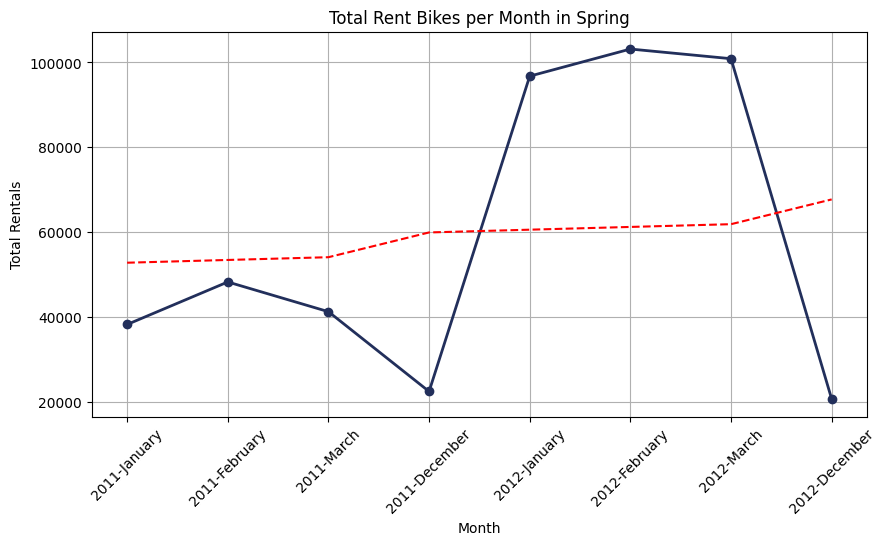

In [28]:
monthly_spring_df = spring_df.resample(rule='M', on='dteday').agg({
    "cnt" : "sum"
})

monthly_spring_df = monthly_spring_df.reset_index()
monthly_spring_df['YearMonth'] = monthly_spring_df['dteday'].dt.strftime('%Y-%B')

monthly_spring_df = monthly_spring_df[monthly_spring_df['cnt'] > 0]


monthly_spring_df['Month_num'] = monthly_spring_df['dteday'].dt.month + 12 * (monthly_spring_df['dteday'].dt.year - monthly_spring_df['dteday'].dt.year.min())
slope, intercept, r_value, p_value, std_err = linregress(monthly_spring_df['Month_num'], monthly_spring_df['cnt'])
monthly_spring_df['Regression'] = slope * monthly_spring_df['Month_num'] + intercept

plt.figure(figsize=(10,5))
plt.plot(monthly_spring_df["YearMonth"], monthly_spring_df["cnt"], marker='o', linewidth=2, color='#222f5b', label='Total Rentals')
plt.plot(monthly_spring_df["YearMonth"], monthly_spring_df['Regression'], color='red', linestyle='--', label='Linear Regression')
plt.title("Total Rent Bikes per Month in Spring")
plt.xlabel("Month")
plt.ylabel("Total Rentals")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True)
plt.show()

/tmp/ipykernel_31244/1060774436.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_summer_df = summer_df.resample(rule='M', on='dteday').agg({


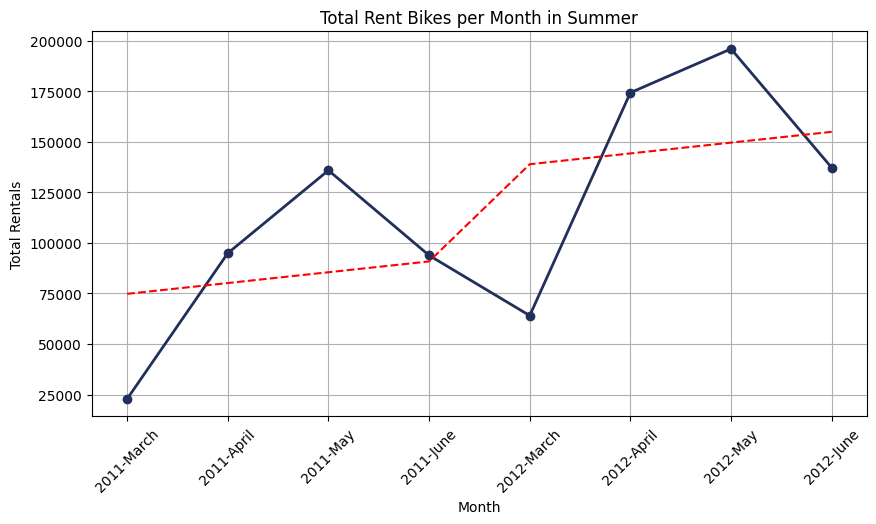

In [29]:
monthly_summer_df = summer_df.resample(rule='M', on='dteday').agg({
    "cnt" : "sum"
})

monthly_summer_df = monthly_summer_df.reset_index()
monthly_summer_df['YearMonth'] = monthly_summer_df['dteday'].dt.strftime('%Y-%B')

monthly_summer_df = monthly_summer_df[monthly_summer_df['cnt'] > 0]


monthly_summer_df['Month_num'] = monthly_summer_df['dteday'].dt.month + 12 * (monthly_summer_df['dteday'].dt.year - monthly_summer_df['dteday'].dt.year.min())
slope, intercept, r_value, p_value, std_err = linregress(monthly_summer_df['Month_num'], monthly_summer_df['cnt'])
monthly_summer_df['Regression'] = slope * monthly_summer_df['Month_num'] + intercept

plt.figure(figsize=(10,5))
plt.plot(monthly_summer_df["YearMonth"], monthly_summer_df["cnt"], marker='o', linewidth=2, color='#222f5b', label='Total Rentals')
plt.plot(monthly_summer_df["YearMonth"], monthly_summer_df['Regression'], color='red', linestyle='--', label='Linear Regression')
plt.title("Total Rent Bikes per Month in Summer")
plt.xlabel("Month")
plt.ylabel("Total Rentals")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True)
plt.show()

/tmp/ipykernel_31244/4260282475.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_fall_df = fall_df.resample(rule='M', on='dteday').agg({


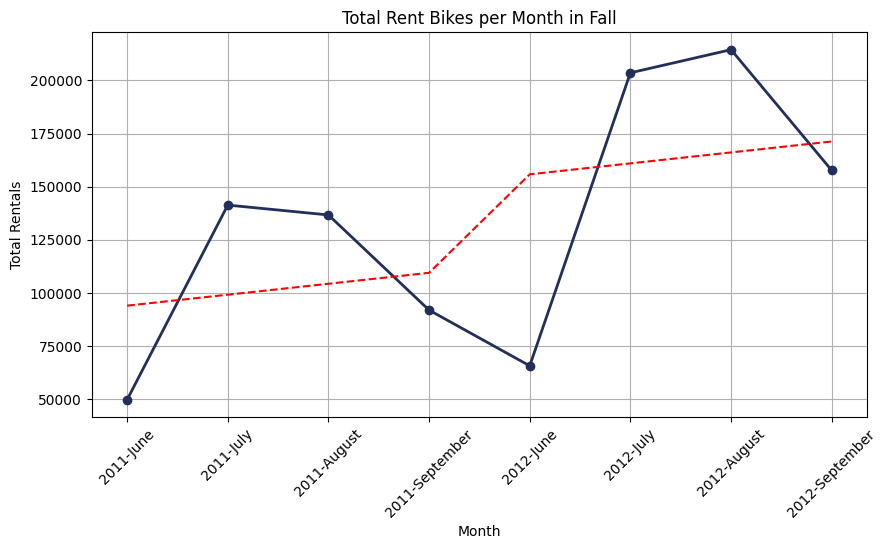

In [30]:
monthly_fall_df = fall_df.resample(rule='M', on='dteday').agg({
    "cnt" : "sum"
})

monthly_fall_df = monthly_fall_df.reset_index()
monthly_fall_df['YearMonth'] = monthly_fall_df['dteday'].dt.strftime('%Y-%B')

monthly_fall_df = monthly_fall_df[monthly_fall_df['cnt'] > 0]


monthly_fall_df['Month_num'] = monthly_fall_df['dteday'].dt.month + 12 * (monthly_fall_df['dteday'].dt.year - monthly_fall_df['dteday'].dt.year.min())
slope, intercept, r_value, p_value, std_err = linregress(monthly_fall_df['Month_num'], monthly_fall_df['cnt'])
monthly_fall_df['Regression'] = slope * monthly_fall_df['Month_num'] + intercept

plt.figure(figsize=(10,5))
plt.plot(monthly_fall_df["YearMonth"], monthly_fall_df["cnt"], marker='o', linewidth=2, color='#222f5b', label='Total Rentals')
plt.plot(monthly_fall_df["YearMonth"], monthly_fall_df['Regression'], color='red', linestyle='--', label='Linear Regression')
plt.title("Total Rent Bikes per Month in Fall")
plt.xlabel("Month")
plt.ylabel("Total Rentals")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True)
plt.show()

/tmp/ipykernel_31244/860226742.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_winter_df = winter_df.resample(rule='M', on='dteday').agg({


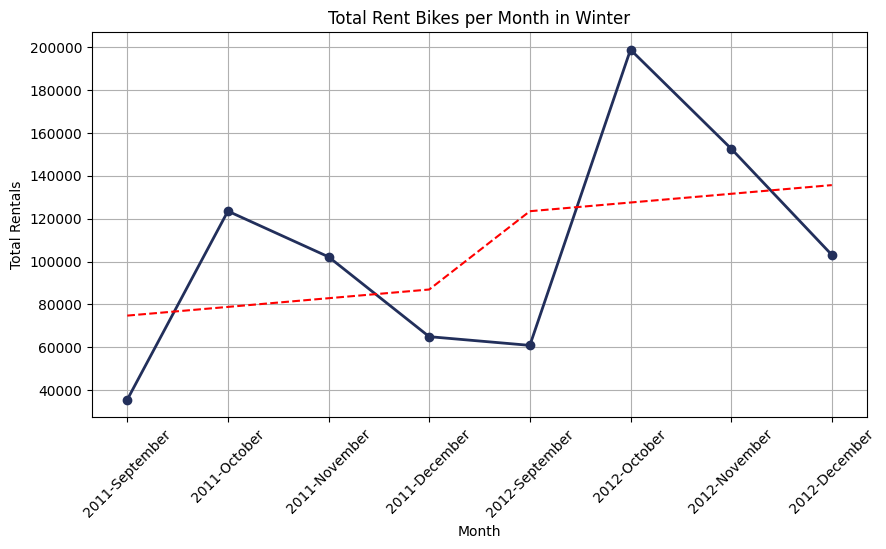

In [31]:
monthly_winter_df = winter_df.resample(rule='M', on='dteday').agg({
    "cnt" : "sum"
})

monthly_winter_df = monthly_winter_df.reset_index()
monthly_winter_df['YearMonth'] = monthly_winter_df['dteday'].dt.strftime('%Y-%B')

monthly_winter_df = monthly_winter_df[monthly_winter_df['cnt'] > 0]


monthly_winter_df['Month_num'] = monthly_winter_df['dteday'].dt.month + 12 * (monthly_winter_df['dteday'].dt.year - monthly_winter_df['dteday'].dt.year.min())
slope, intercept, r_value, p_value, std_err = linregress(monthly_winter_df['Month_num'], monthly_winter_df['cnt'])
monthly_winter_df['Regression'] = slope * monthly_winter_df['Month_num'] + intercept

plt.figure(figsize=(10,5))
plt.plot(monthly_winter_df["YearMonth"], monthly_winter_df["cnt"], marker='o', linewidth=2, color='#222f5b', label='Total Rentals')
plt.plot(monthly_winter_df["YearMonth"], monthly_winter_df['Regression'], color='red', linestyle='--', label='Linear Regression')
plt.title("Total Rent Bikes per Month in Winter")
plt.xlabel("Month")
plt.ylabel("Total Rentals")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True)
plt.show()

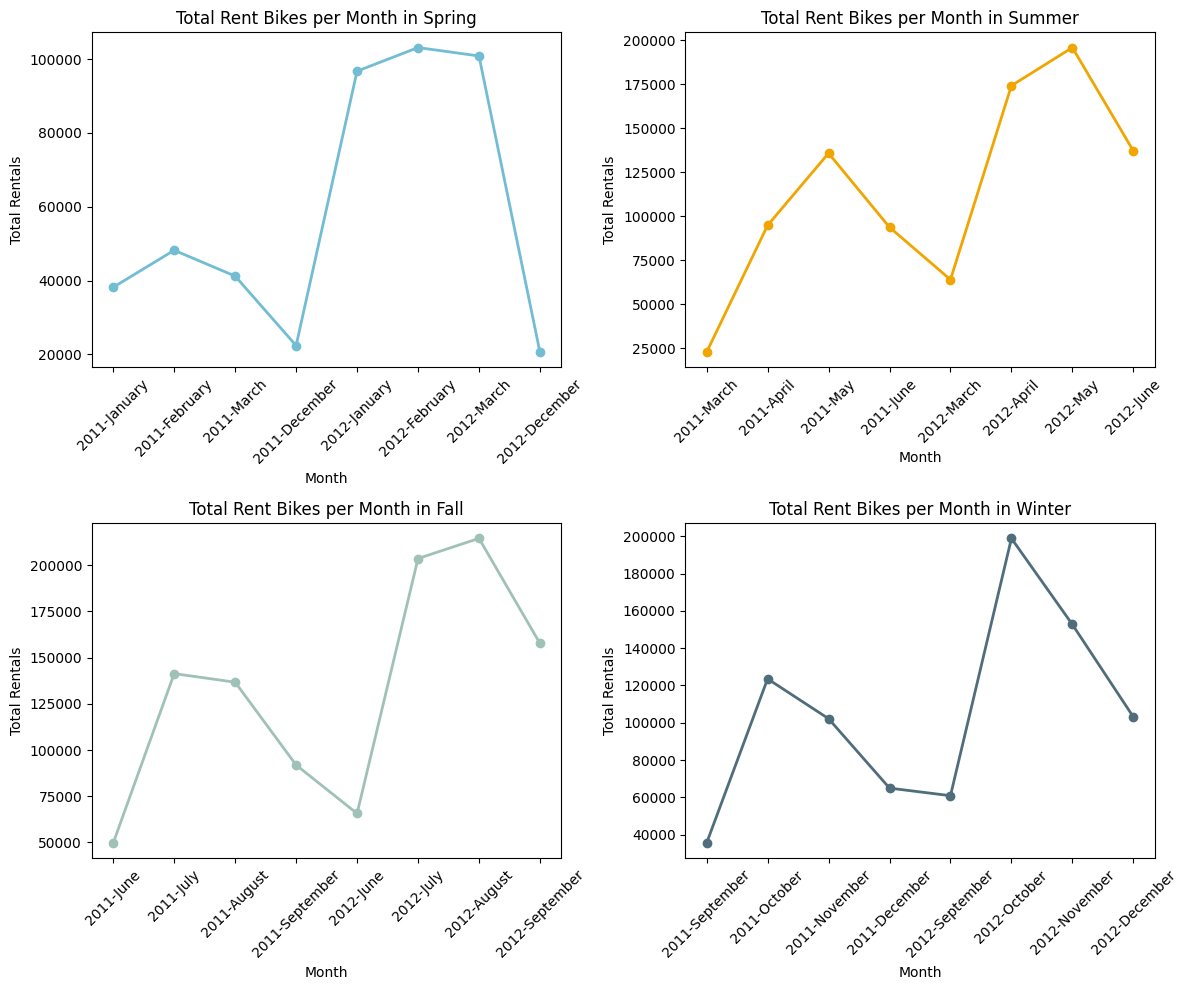

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))  

ax[0, 0].plot(monthly_spring_df["YearMonth"], monthly_spring_df["cnt"], marker='o', linewidth=2, color='#72BCD4')
ax[0, 0].set_title("Total Rent Bikes per Month in Spring")
ax[0, 0].set_xlabel("Month")
ax[0, 0].set_ylabel("Total Rentals")
ax[0, 0].tick_params(axis='x', rotation=45)

ax[0, 1].plot(monthly_summer_df["YearMonth"], monthly_summer_df["cnt"], marker='o', linewidth=2, color='#F0A500')
ax[0, 1].set_title("Total Rent Bikes per Month in Summer")
ax[0, 1].set_xlabel("Month")
ax[0, 1].set_ylabel("Total Rentals")
ax[0, 1].tick_params(axis='x', rotation=45)

ax[1, 0].plot(monthly_fall_df["YearMonth"], monthly_fall_df["cnt"], marker='o', linewidth=2, color='#A0C1B8')
ax[1, 0].set_title("Total Rent Bikes per Month in Fall")
ax[1, 0].set_xlabel("Month")
ax[1, 0].set_ylabel("Total Rentals")
ax[1, 0].tick_params(axis='x', rotation=45)

ax[1, 1].plot(monthly_winter_df["YearMonth"], monthly_winter_df["cnt"], marker='o', linewidth=2, color='#4F6D7A')
ax[1, 1].set_title("Total Rent Bikes per Month in Winter")
ax[1, 1].set_xlabel("Month")
ax[1, 1].set_ylabel("Total Rentals")
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

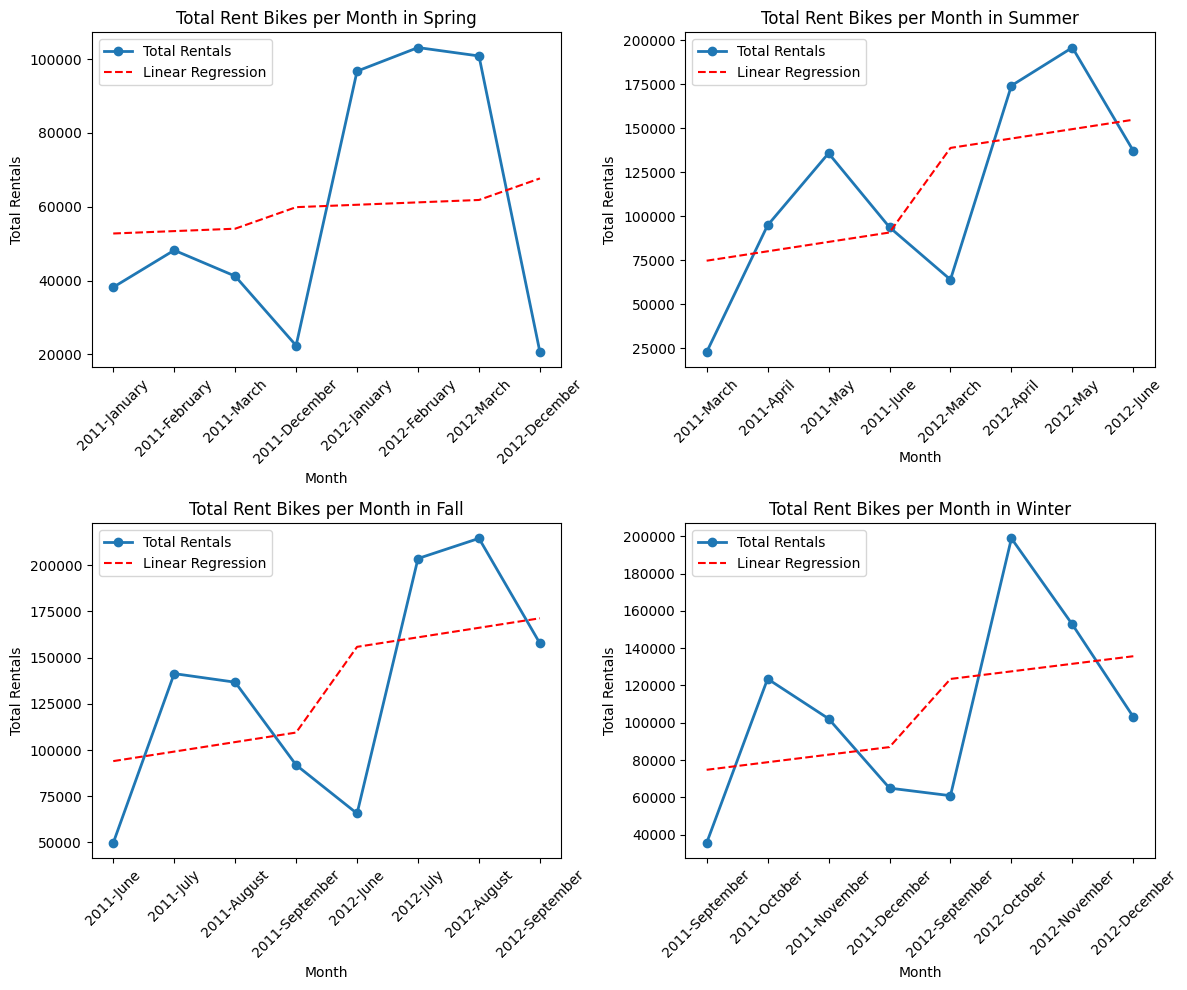

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))  

def add_linear_regression(ax, df, x_column, y_column):
    df['Month_num'] = df['dteday'].dt.month + 12 * (df['dteday'].dt.year - df['dteday'].dt.year.min())
    
    slope, intercept, _, _, _ = linregress(df['Month_num'], df[y_column])
    
    df['Regression'] = slope * df['Month_num'] + intercept
    
    ax.plot(df[x_column], df[y_column], marker='o', linewidth=2, label='Total Rentals')
    ax.plot(df[x_column], df['Regression'], color='red', linestyle='--', label='Linear Regression')
    
    ax.set_xlabel("Month")
    ax.set_ylabel("Total Rentals")
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

add_linear_regression(ax[0, 0], monthly_spring_df, "YearMonth", "cnt")
ax[0, 0].set_title("Total Rent Bikes per Month in Spring")

add_linear_regression(ax[0, 1], monthly_summer_df, "YearMonth", "cnt")
ax[0, 1].set_title("Total Rent Bikes per Month in Summer")

add_linear_regression(ax[1, 0], monthly_fall_df, "YearMonth", "cnt")
ax[1, 0].set_title("Total Rent Bikes per Month in Fall")

add_linear_regression(ax[1, 1], monthly_winter_df, "YearMonth", "cnt")
ax[1, 1].set_title("Total Rent Bikes per Month in Winter")

plt.tight_layout()

plt.show()

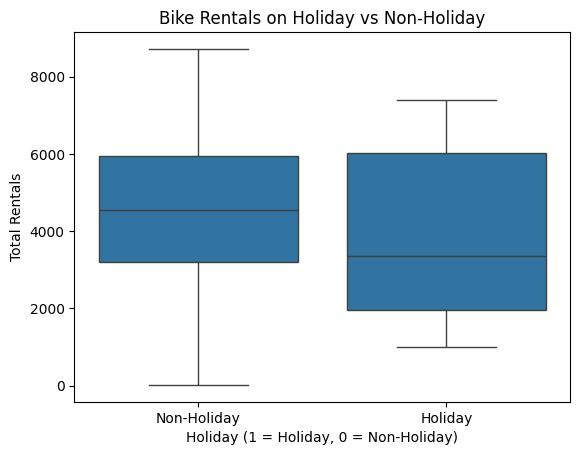

In [34]:
sns.boxplot(x='holiday', y='cnt', data=day_df)
plt.title("Bike Rentals on Holiday vs Non-Holiday")
plt.xlabel("Holiday (1 = Holiday, 0 = Non-Holiday)")
plt.ylabel("Total Rentals")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

In [35]:
holiday_rentals = day_df[day_df['holiday'] == 1]['cnt']
non_holiday_rentals = day_df[day_df['holiday'] == 0]['cnt']

t_stat, p_value = ttest_ind(holiday_rentals, non_holiday_rentals)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between holiday and bike rentals (reject the null hypothesis).")
else:
    print("There is no significant correlation between holiday and bike rentals (fail to reject the null hypothesis).")

T-statistic: -1.8497137724448645
P-value: 0.06475935792611008
There is no significant correlation between holiday and bike rentals (fail to reject the null hypothesis).


In [36]:
# RFM Analysys

In [37]:
reference_date = day_df['dteday'].max()

rfm_df = day_df.groupby('instant').agg({
'dteday': lambda x: (reference_date - x.max()).days, 
'instant': 'count', 
'cnt': 'sum'         
})

rfm_df.rename(columns={
    'dteday': 'Recency', 
    'instant': 'Frequency', 
    'cnt': 'Monetary'
    }, inplace=True)

rfm_df.sample(5)

,Recency,Frequency,Monetary
instant,,,
442,289,1,7836
182,549,1,5362
113,618,1,4036
104,627,1,3267
230,501,1,3805
